In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns

In [2]:
df = pd.read_parquet("microdados_enem_2016_reduced.parquet", engine="fastparquet")

In [3]:
sit_labels = ["Já concluí o Ensino Médio", 
              "Estou cursando e concluirei o Ensino Médio em 2016", 
              "Estou cursando e concluirei o Ensino Médio após 2016", 
              "Não concluí e não estou cursando o Ensino Médio"]
df_sit = pd.DataFrame({"Descrição": sit_labels, "Quantidade": df["TP_ST_CONCLUSAO"].value_counts().values})
display(df_sit)

,Descrição,Quantidade
0,Já concluí o Ensino Médio,4928251
1,Estou cursando e concluirei o Ensino Médio em ...,1882278
2,Estou cursando e concluirei o Ensino Médio apó...,1344085
3,Não concluí e não estou cursando o Ensino Médio,472753


In [4]:
df_sit_q46 = pd.DataFrame({"Descrição": sit_labels, "TP_ST_CONCLUSAO": df["TP_ST_CONCLUSAO"].value_counts().values,
                          "Q046": df["Q046"].value_counts().values})
display(df_sit_q46)

,Descrição,TP_ST_CONCLUSAO,Q046
0,Já concluí o Ensino Médio,4928251,4947935
1,Estou cursando e concluirei o Ensino Médio em ...,1882278,1872570
2,Estou cursando e concluirei o Ensino Médio apó...,1344085,1331073
3,Não concluí e não estou cursando o Ensino Médio,472753,475785


In [5]:
ano_labels = ["Não informado", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008", "2007", "Anterior a 2007"]
ano_sit = pd.DataFrame({"Descrição": ano_labels, "Quantidade": df["TP_ANO_CONCLUIU"].value_counts().sort_index().values})
display(ano_sit)

,Descrição,Quantidade
0,Não informado,3699116
1,2015,966842
2,2014,699987
3,2013,527310
4,2012,416454
5,2011,317364
6,2010,294214
7,2009,244461
8,2008,199619
9,2007,178091


In [6]:
ensino_labels = ["Ensino Regular", "Educação Especial - Modalidade Substitutiva", "Educação de Jovens e Adultos"]
ensino_sit = pd.DataFrame({"Descrição": ensino_labels, "Quantidade": df["TP_ENSINO"].value_counts().sort_index().values})
display(ensino_sit)

,Descrição,Quantidade
0,Ensino Regular,1652485
1,Educação Especial - Modalidade Substitutiva,10295
2,Educação de Jovens e Adultos,218532


In [7]:
len_co_escola = df["CO_ESCOLA"].dropna().str.len().values

In [8]:
print("Tamanho médio de CO_ESCOLA: ", np.average(len_co_escola))

Tamanho médio de CO_ESCOLA:  8.0


In [9]:
v_total = len(df)

In [10]:
#Sem valor nulo na coluna
df.drop(df.loc[df['TP_SEXO'].isnull()].index, inplace=True)
v_f1 = v_total

In [11]:
df.drop(df.loc[df['TP_ST_CONCLUSAO']==3].index, inplace=True)
df.drop(df.loc[df['TP_ST_CONCLUSAO']==4].index, inplace=True)
v_f2 = len(df)

In [12]:
#df.drop(df.loc[df['TP_ANO_CONCLUIU']==0].index, inplace=True)
df.drop(df.loc[df['TP_ANO_CONCLUIU']==10].index, inplace=True)
v_f3 = len(df)

In [13]:
df.drop(df.loc[df['TP_ESCOLA']==4].index, inplace=True)
v_f4 = len(df)

In [14]:
df.drop(df.loc[df['TP_ENSINO']==2].index, inplace=True)
df.drop(df.loc[df['TP_ENSINO']==3].index, inplace=True)
v_f5 = len(df)

In [15]:
df.drop(df.loc[df['IN_TREINEIRO']==1].index, inplace=True)
v_f6 = len(df)

In [16]:
df.drop(df.loc[df['CO_ESCOLA'].isnull()].index, inplace=True)
v_f7 = len(df)

In [17]:
df.drop(df.loc[df['NU_NOTA_CN'].isnull()].index, inplace=True)
df.drop(df.loc[df['NU_NOTA_CH'].isnull()].index, inplace=True)
df.drop(df.loc[df['NU_NOTA_LC'].isnull()].index, inplace=True)
df.drop(df.loc[df['NU_NOTA_MT'].isnull()].index, inplace=True)
v_f8 = len(df)

In [18]:
f_qte = [v_total, v_f1, v_f2, v_f3, v_f4, v_f5, v_f6, v_f7, v_f8]
f_perc = [v_total/v_total, v_f1/v_total, v_f2/v_total, v_f3/v_total, v_f4/v_total, v_f5/v_total, v_f6/v_total, v_f7/v_total, v_f8/v_total]

In [19]:
row_labels = ["Sem filtro", "Filtro 1", "Filtro 2", "Filtro 3", "Filtro 4", "Filtro 5", "Filtro 6", "Filtro 7", "Filtro 8"]

In [20]:
df_filtros = pd.DataFrame({"Quantidade": f_qte,
                "Percentual": f_perc})

In [21]:
df_filtros.index = row_labels
df_filtros_formatted = df_filtros.style.format({'Percentual': "{:,.2%}"})
display(df_filtros_formatted)

,Quantidade,Percentual
Sem filtro,8627367,100.00%
Filtro 1,8627367,100.00%
Filtro 2,6810529,78.94%
Filtro 3,5726620,66.38%
Filtro 4,5725635,66.37%
Filtro 5,5496816,63.71%
Filtro 6,5496816,63.71%
Filtro 7,1652471,19.15%
Filtro 8,1388044,16.09%


In [22]:
cols = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df['NOTAS_STR'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [23]:
df['NOTAS_STR'] = df['NOTAS_STR']

In [24]:
notasconcat_value_counts = df['NOTAS_STR'].value_counts(dropna=True, sort=True)
df_notasconcat_val_counts = pd.DataFrame(notasconcat_value_counts)
df_notasconcat_value_counts_reset = df_notasconcat_val_counts.reset_index()
df_notasconcat_value_counts_reset.columns = ['String concatenada', 'Quantidade']
display(df_notasconcat_value_counts_reset)

,String concatenada,Quantidade
0,544.2_446.1_500.5_599.3_580.0,1
1,583.6_462.0_512.1_502.3_560.0,1
2,600.9_602.1_594.1_596.4_800.0,1
3,639.6_551.2_595.6_754.4_600.0,1
4,578.8_433.9_568.5_439.4_540.0,1
...,...,...
1388039,370.5_402.7_396.5_443.1_360.0,1
1388040,494.2_422.2_420.4_465.8_620.0,1
1388041,458.3_428.0_450.9_387.5_560.0,1
1388042,476.9_392.6_437.9_435.5_380.0,1


In [25]:
notas_cn_dict = df['NU_NOTA_CN'].value_counts().to_dict()

In [26]:
notas_ch_dict = df['NU_NOTA_CH'].value_counts().to_dict()

In [27]:
notas_lc_dict = df['NU_NOTA_LC'].value_counts().to_dict()

In [28]:
notas_mt_dict = df['NU_NOTA_MT'].value_counts().to_dict()

In [29]:
notas_red_dict = df['NU_NOTA_REDACAO'].value_counts().to_dict()

In [30]:
notas_cn_list = [key for key, val in notas_cn_dict.items() for _ in range(val)]
notas_ch_list = [key for key, val in notas_ch_dict.items() for _ in range(val)]
notas_lc_list = [key for key, val in notas_lc_dict.items() for _ in range(val)]
notas_mt_list = [key for key, val in notas_mt_dict.items() for _ in range(val)]
notas_red_list = [key for key, val in notas_red_dict.items() for _ in range(val)]

In [31]:
notas_intervalo = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

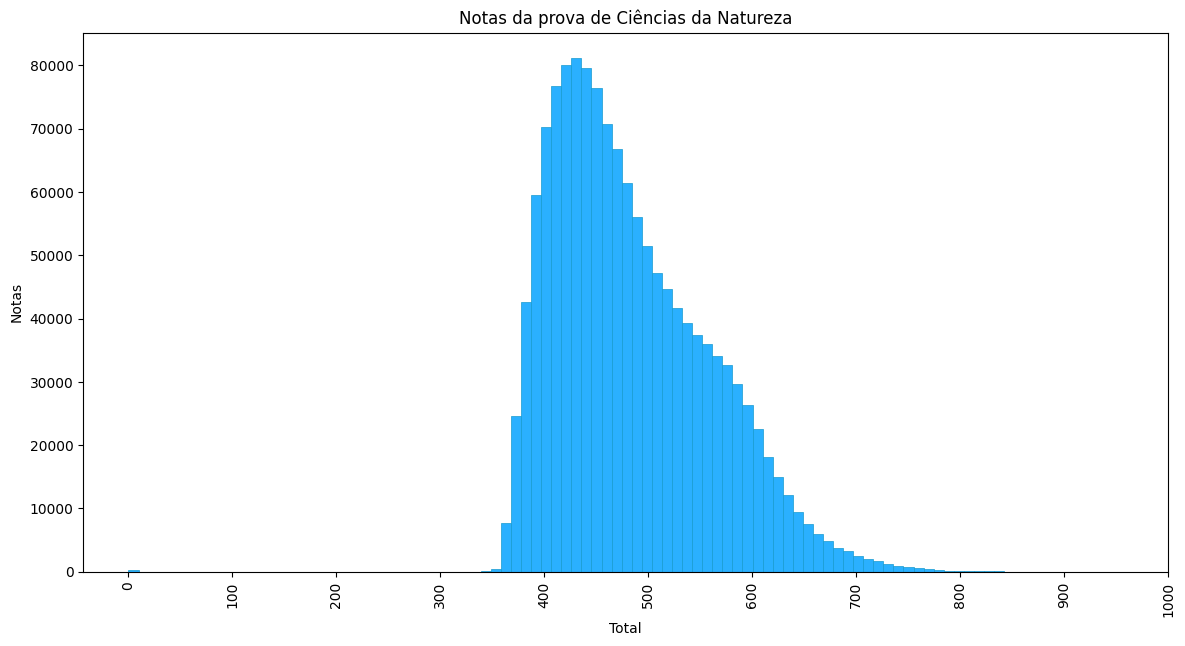

In [32]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_cn_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Ciências da Natureza') 
plt.xlabel('Total') 
plt.ylabel('Notas')
#plt.savefig("notas_cn.png")
plt.show()


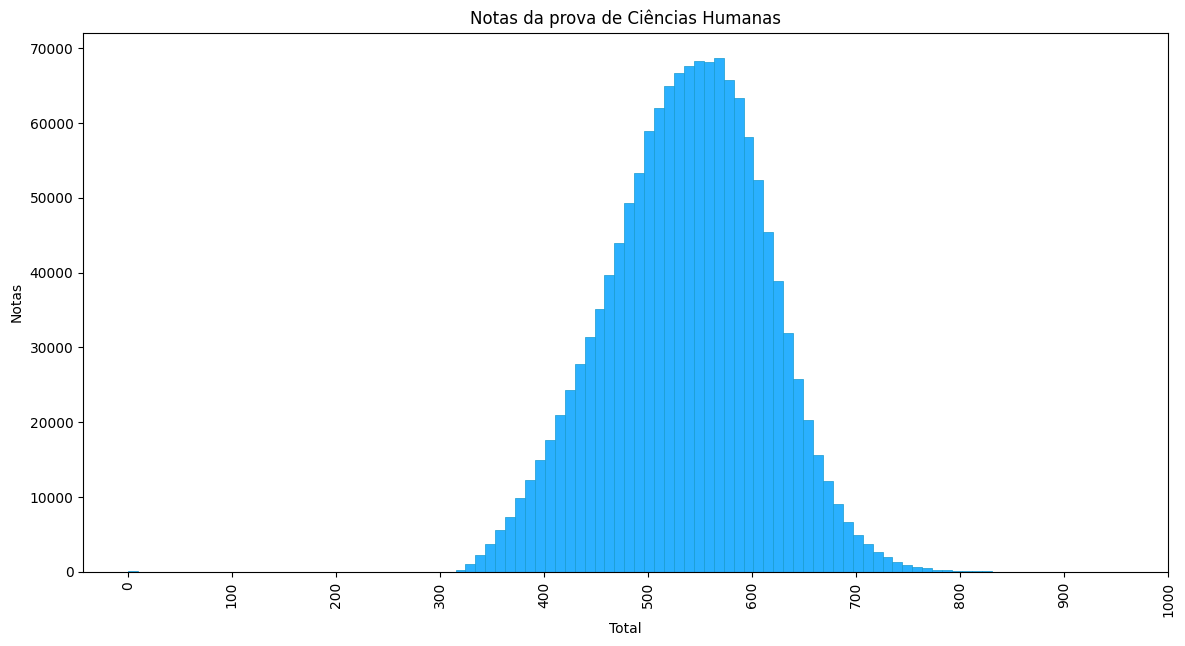

In [33]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_ch_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Ciências Humanas') 
plt.xlabel('Total') 
plt.ylabel('Notas')
#plt.savefig("notas_ch.png")
plt.show()

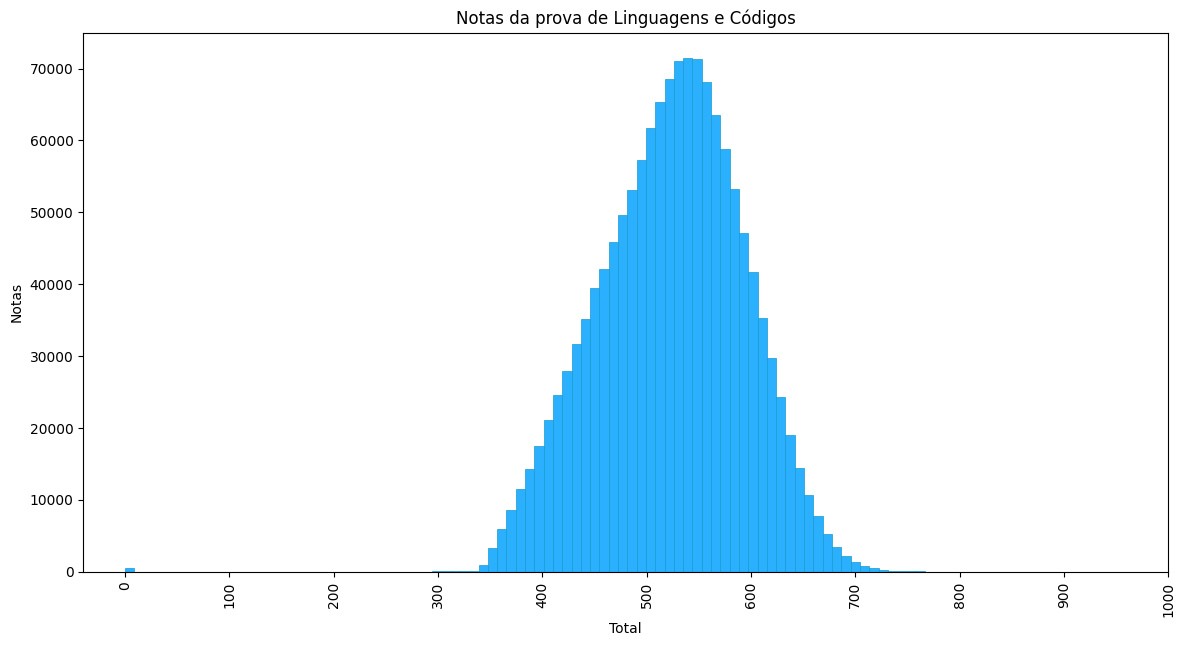

In [34]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_lc_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Linguagens e Códigos') 
plt.xlabel('Total') 
plt.ylabel('Notas')
#plt.savefig("notas_lc.png")
plt.show()


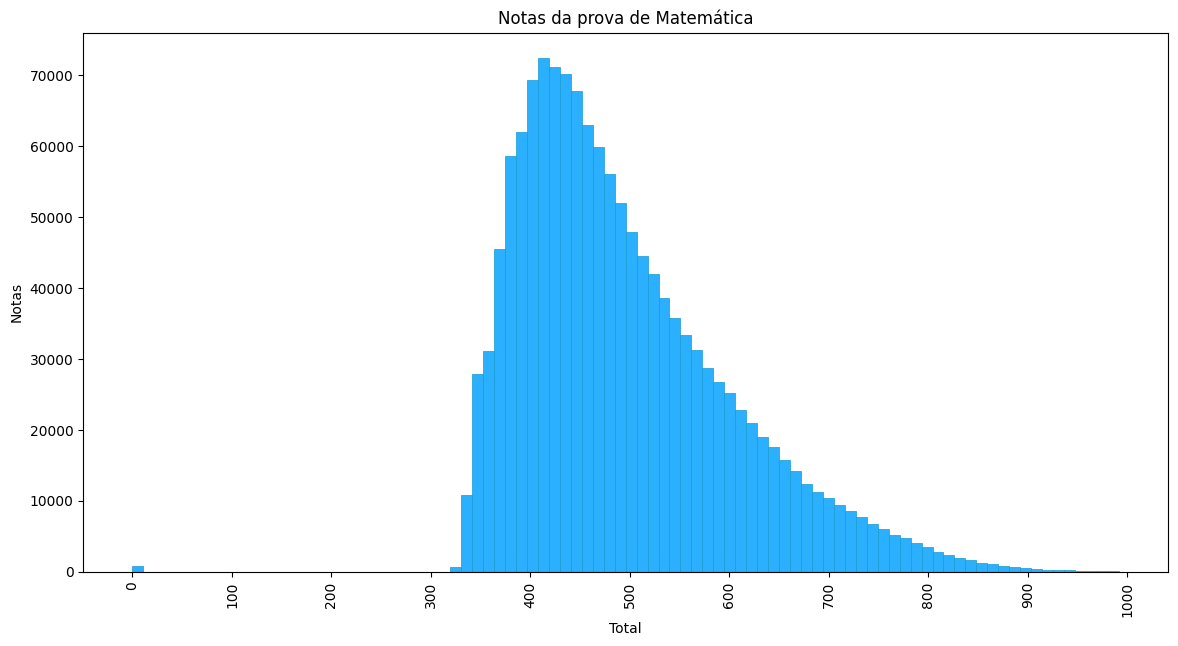

In [35]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_mt_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Matemática') 
plt.xlabel('Total') 
plt.ylabel('Notas') 
#plt.savefig("notas_mt.png")
plt.show()


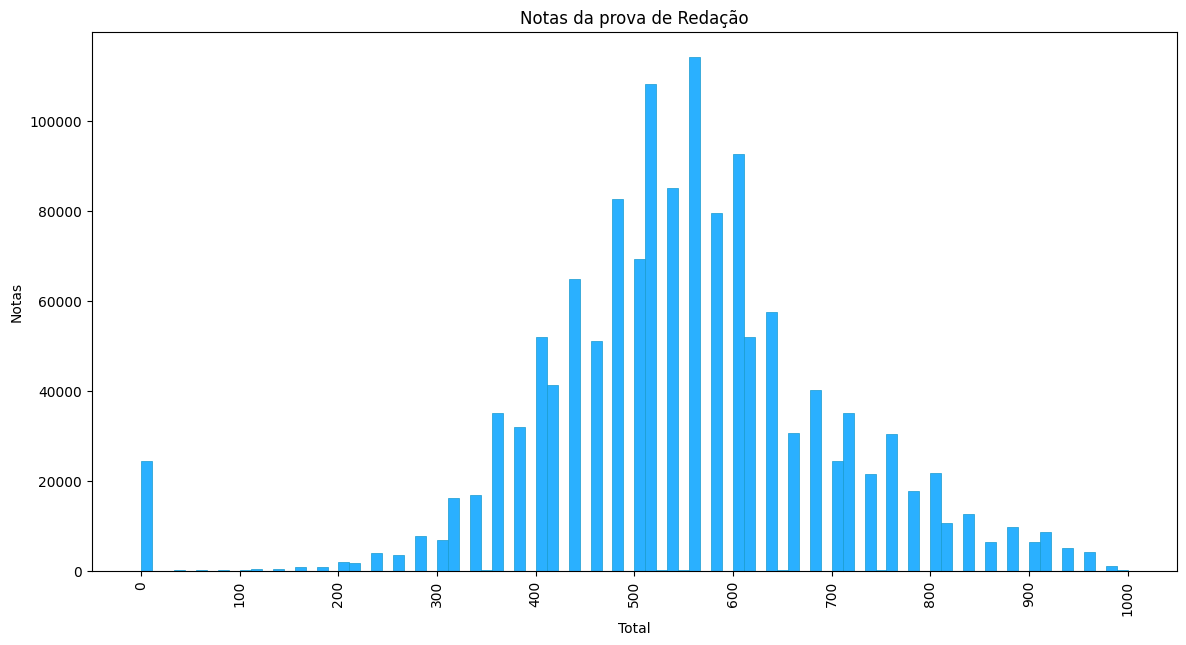

In [36]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_red_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Redação') 
plt.xlabel('Total') 
plt.ylabel('Notas') 
#plt.savefig("notas_red.png")
plt.show()


In [37]:
df_uf = pd.DataFrame({"UF": df['SG_UF_RESIDENCIA'].value_counts(ascending = False).index,
                      "Quantidade": df['SG_UF_RESIDENCIA'].value_counts(ascending = False).values,
                     "Percentual": df['SG_UF_RESIDENCIA'].value_counts(normalize=True, ascending = False).values*100})
display(df_uf)

,UF,Quantidade,Percentual
0,SP,303127,21.838429
1,MG,131502,9.473907
2,RJ,94992,6.843587
3,CE,88077,6.345404
4,BA,79438,5.723017
5,PR,77315,5.570068
6,RS,65511,4.719663
7,PE,63760,4.593514
8,PA,57917,4.172562
9,SC,51234,3.691093


In [38]:
df_uf["Percentual"] = df_uf["Percentual"].round(2)
df_uf["Percentual"] = df_uf["Percentual"].astype(str) + '%'

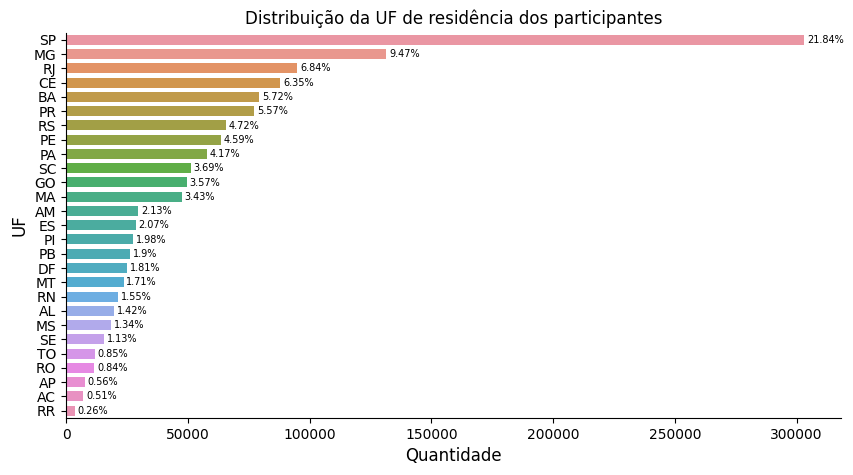

In [39]:
%matplotlib inline
plt.figure(figsize=(10,5))
ax = sns.barplot(data = df_uf, y = "UF", x = "Quantidade", alpha=1, width=0.70, dodge=False)
plt.title('Distribuição da UF de residência dos participantes')
plt.ylabel('UF', fontsize=12)
plt.xlabel('Quantidade', fontsize=12)
for c in ax.containers:
    labels = df_uf["Percentual"]
    ax.bar_label(c, labels, padding=2, fontsize=7)
sns.despine()
plt.savefig("dist_uf.png")
plt.show()

In [40]:
idade = df[["NU_IDADE", "TP_SEXO"]]
idade = idade.dropna()
idade_h = idade[idade['TP_SEXO'] == "M"]
idade_m = idade[idade['TP_SEXO'] == "F"]
idade_h = idade_h['NU_IDADE']
idade_m = idade_m['NU_IDADE']

In [41]:
idade_m_obs = idade_m.value_counts(ascending = False).sort_index()
idade_m = idade_m.to_numpy()
idade_m_media = np.average(idade_m)
idade_m_dp = np.std(idade_m)

In [42]:
idade_h_obs = idade_h.value_counts(ascending = False).sort_index()
idade_h = idade_h.to_numpy()
idade_h_media = np.average(idade_h)
idade_h_dp = np.std(idade_h)

In [43]:
df_idade = pd.DataFrame({"Média": [idade_m_media, idade_h_media],
                "Desvio padrão": [idade_m_dp, idade_h_dp]})
df_idade.index = ["Feminino", "Masculino"]
display(df_idade)

,Média,Desvio padrão
Feminino,17.694373,1.960211
Masculino,17.765918,1.640337


In [44]:
df_m_idade = pd.DataFrame({"Idade (Fem.)": idade_m_obs.index,
                "Quantidade de observações": idade_m_obs.values})
display(df_m_idade)

,Idade (Fem.),Quantidade de observações
0,10,1
1,11,2
2,12,1
3,13,10
4,14,72
...,...,...
56,66,6
57,68,1
58,70,1
59,72,1


In [45]:
df_h_idade = pd.DataFrame({"Idade (Masc.)": idade_h_obs.index,
                "Quantidade de observações": idade_h_obs.values})
display(df_h_idade)

,Idade (Masc.),Quantidade de observações
0,13,3
1,14,47
2,15,603
3,16,21303
4,17,287349
5,18,181008
6,19,56438
7,20,19405
8,21,7164
9,22,3246


In [46]:
raca = df[["TP_COR_RACA", "TP_SEXO"]]
raca = raca.dropna()
raca_h = raca[raca['TP_SEXO'] == "M"]
raca_m = raca[raca['TP_SEXO'] == "F"]
raca_h = raca_h['TP_COR_RACA']
raca_m = raca_m['TP_COR_RACA']

In [47]:
raca_h_obs = raca_h.value_counts().sort_index()
raca_m_obs = raca_m.value_counts().sort_index()

In [48]:
raca_h_decl = 0
for x in range (1, 6):
    raca_h_decl = raca_h_decl + raca_h_obs[x]
raca_h_ndecl = raca_h_obs[0] + raca_h_obs[6]
raca_h_total = len(raca_h)

In [49]:
raca_m_decl = 0
for x in range (1, 6):
    raca_m_decl = raca_m_decl + raca_m_obs[x]
raca_m_ndecl = raca_m_obs[0] + raca_m_obs[6]
raca_m_total = len(raca_m)

In [50]:
df_raca = pd.DataFrame({"Perc. feminino": [raca_m_decl/raca_m_total, raca_m_ndecl/raca_m_total],
                "Perc. masculino": [raca_h_decl/raca_h_total, raca_h_ndecl/raca_h_total]})
df_raca.index = ["Raça declarada", "Sem resposta"]
df_raca_formatted = df_raca.style.format({'Perc. feminino': "{:,.2%}",
                                          'Perc. masculino': "{:,.2%}"})
display(df_raca_formatted)

,Perc. feminino,Perc. masculino
Raça declarada,98.56%,98.17%
Sem resposta,1.44%,1.83%


In [51]:
pai = df[["Q001", "TP_SEXO"]]
pai = pai.dropna()
pai_h = pai[pai['TP_SEXO'] == "M"]
pai_m = pai[pai['TP_SEXO'] == "F"]
pai_h = pai_h['Q001']
pai_m = pai_m['Q001']

In [52]:
pai_m_total = len(pai_m)
pai_m_obs = pai_m.value_counts().sort_index()
pai_m_sem_em_total = pai_m_obs["A"] + pai_m_obs["B"] + pai_m_obs["C"] + pai_m_obs["D"] + pai_m_obs["H"]
pai_m_em_total = pai_m_obs["E"] + pai_m_obs["F"] + pai_m_obs["G"]

In [53]:
pai_h_total = len(pai_h)
pai_h_obs = pai_h.value_counts().sort_index()
pai_h_sem_em_total = pai_h_obs["A"] + pai_h_obs["B"] + pai_h_obs["C"] + pai_h_obs["D"] + pai_h_obs["H"]
pai_h_em_total = pai_h_obs["E"] + pai_h_obs["F"] + pai_h_obs["G"]

In [54]:
df_pai_em = pd.DataFrame({"Perc. feminino": [pai_m_sem_em_total/pai_m_total, pai_m_em_total/pai_m_total],
                "Perc. masculino": [pai_h_sem_em_total/pai_h_total, pai_h_em_total/pai_h_total]})
df_pai_em.index = ["Sem ensino médio completo", "Com ensino médio completo"]
df_pai_formatted = df_pai_em.style.format({'Perc. feminino': "{:,.2%}",
                                          'Perc. masculino': "{:,.2%}"})
display(df_pai_formatted)


,Perc. feminino,Perc. masculino
Sem ensino médio completo,60.99%,55.28%
Com ensino médio completo,39.01%,44.72%


In [55]:
mae = df[["Q002", "TP_SEXO"]]
mae = mae.dropna()
mae_h = mae[mae['TP_SEXO'] == "M"]
mae_m = mae[mae['TP_SEXO'] == "F"]
mae_h = mae_h['Q002']
mae_m = mae_m['Q002']

In [56]:
mae_m_total = len(mae_m)
mae_m_obs = mae_m.value_counts().sort_index()
mae_m_sem_em_total = mae_m_obs["A"] + mae_m_obs["B"] + mae_m_obs["C"] + mae_m_obs["D"] + mae_m_obs["H"]
mae_m_em_total = mae_m_obs["E"] + mae_m_obs["F"] + mae_m_obs["G"]

In [57]:
mae_h_total = len(mae_h)
mae_h_obs = mae_h.value_counts().sort_index()
mae_h_sem_em_total = mae_h_obs["A"] + mae_h_obs["B"] + mae_h_obs["C"] + mae_h_obs["D"] + mae_h_obs["H"]
mae_h_em_total = mae_h_obs["E"] + mae_h_obs["F"] + mae_h_obs["G"]

In [58]:
df_mae_em = pd.DataFrame({"Perc. feminino": [mae_m_sem_em_total/mae_m_total, mae_m_em_total/mae_m_total],
                "Perc. masculino": [mae_h_sem_em_total/mae_h_total, mae_h_em_total/mae_h_total]})
df_mae_em.index = ["Sem ensino médio completo", "Com ensino médio completo"]
df_mae_formatted = df_mae_em.style.format({'Perc. feminino': "{:,.2%}",
                                          'Perc. masculino': "{:,.2%}"})
display(df_mae_formatted)

,Perc. feminino,Perc. masculino
Sem ensino médio completo,49.74%,44.31%
Com ensino médio completo,50.26%,55.69%


In [59]:
dep_adm = df[["TP_DEPENDENCIA_ADM_ESC", "TP_SEXO"]]
dep_adm = dep_adm.dropna()
dep_adm_h = dep_adm[dep_adm['TP_SEXO'] == "M"]
dep_adm_m = dep_adm[dep_adm['TP_SEXO'] == "F"]
dep_adm_h = dep_adm_h['TP_DEPENDENCIA_ADM_ESC']
dep_adm_m = dep_adm_m['TP_DEPENDENCIA_ADM_ESC']

In [60]:
dep_adm_h_total = len(dep_adm_h)
dep_adm_h_obs = dep_adm_h.value_counts().sort_index()
dep_fed_h = dep_adm_h_obs[1]
dep_est_h = dep_adm_h_obs[2]
dep_mun_h = dep_adm_h_obs[3]
dep_priv_h = dep_adm_h_obs[4]

In [61]:
dep_adm_m_total = len(dep_adm_m)
dep_adm_m_obs = dep_adm_m.value_counts().sort_index()
dep_fed_m = dep_adm_m_obs[1]
dep_est_m = dep_adm_m_obs[2]
dep_mun_m = dep_adm_m_obs[3]
dep_priv_m = dep_adm_m_obs[4]

In [62]:
df_dep_adm = pd.DataFrame({"Perc. feminino": [dep_fed_m/dep_adm_m_total, dep_est_m/dep_adm_m_total, dep_mun_m/dep_adm_m_total, dep_priv_m/dep_adm_m_total],
                "Perc. masculino": [dep_fed_h/dep_adm_h_total, dep_est_h/dep_adm_h_total, dep_mun_h/dep_adm_h_total, dep_priv_h/dep_adm_h_total]})
df_dep_adm.index = ["Federal", "Estadual", "Municipal", "Privada"]
df_dep_adm_formatted = df_dep_adm.style.format({'Perc. feminino': "{:,.2%}",
                                                'Perc. masculino': "{:,.2%}"})
display(df_dep_adm_formatted)

,Perc. feminino,Perc. masculino
Federal,2.21%,2.99%
Estadual,77.33%,73.80%
Municipal,0.92%,0.88%
Privada,19.53%,22.32%


In [63]:
nch = df[["NU_NOTA_CH", "TP_SEXO"]]
nch = nch.dropna()
nch_h = nch[nch['TP_SEXO'] == "M"]
nch_m = nch[nch['TP_SEXO'] == "F"]
nch_h = nch_h['NU_NOTA_CH']
nch_m = nch_m['NU_NOTA_CH']

In [64]:
nch_m_obs = nch_m.value_counts(ascending = False).sort_index()
nch_m = nch_m.to_numpy()
nch_m_media = np.average(nch_m)
nch_m_dp = np.std(nch_m)

In [65]:
nch_h_obs = nch_h.value_counts(ascending = False).sort_index()
nch_h = nch_h.to_numpy()
nch_h_media = np.average(nch_h)
nch_h_dp = np.std(nch_h)

In [66]:
df_nch = pd.DataFrame({"Média": [nch_m_media, nch_h_media],
                "Desvio padrão": [nch_m_dp, nch_h_dp]})
df_nch.index = ["Feminino", "Masculino"]
display(df_nch)

,Média,Desvio padrão
Feminino,532.115234,72.753738
Masculino,544.006470,76.722786


In [67]:
df_nch_h = pd.DataFrame({"Nota (Masc.)": nch_h_obs.index,
                "Quantidade de observações": nch_h_obs.values})
display(df_nch_h)

,Nota (Masc.),Quantidade de observações
0,0.000000,36
1,319.899994,7
2,320.000000,2
3,320.100006,1
4,320.299988,1
...,...,...
4747,840.400024,1
4748,847.299988,1
4749,848.500000,1
4750,850.599976,1


In [68]:
df_nch_m = pd.DataFrame({"Nota (Fem.)": nch_m_obs.index,
                "Quantidade de observações": nch_m_obs.values})
display(df_nch_m)

,Nota (Fem.),Quantidade de observações
0,0.000000,52
1,319.899994,10
2,320.000000,2
3,320.100006,2
4,320.200012,2
...,...,...
4683,836.299988,1
4684,839.500000,1
4685,840.400024,2
4686,848.500000,2


In [69]:
ncn = df[["NU_NOTA_CN", "TP_SEXO"]]
ncn = ncn.dropna()
ncn_h = ncn[ncn['TP_SEXO'] == "M"]
ncn_m = ncn[ncn['TP_SEXO'] == "F"]
ncn_h = ncn_h['NU_NOTA_CN']
ncn_m = ncn_m['NU_NOTA_CN']

In [70]:
ncn_m_obs = ncn_m.value_counts(ascending = False).sort_index()
ncn_m = ncn_m.to_numpy()
ncn_m_media = np.average(ncn_m)
ncn_m_dp = np.std(ncn_m)

In [71]:
ncn_h_obs = ncn_h.value_counts(ascending = False).sort_index()
ncn_h = ncn_h.to_numpy()
ncn_h_media = np.average(ncn_h)
ncn_h_dp = np.std(ncn_h)

In [72]:
df_ncn = pd.DataFrame({"Média": [ncn_m_media, ncn_h_media],
                "Desvio padrão": [ncn_m_dp, ncn_h_dp]})
df_ncn.index = ["Feminino", "Masculino"]
display(df_ncn)

,Média,Desvio padrão
Feminino,474.435425,71.179276
Masculino,495.017548,78.943649


In [73]:
df_ncn_h = pd.DataFrame({"Nota (Masc.)": ncn_h_obs.index,
                "Quantidade de observações": ncn_h_obs.values})
display(df_ncn_h)

,Nota (Masc.),Quantidade de observações
0,0.000000,138
1,342.700012,1
2,343.299988,1
3,343.500000,1
4,344.600006,1
...,...,...
4538,849.599976,2
4539,853.900024,1
4540,861.400024,2
4541,862.400024,2


In [74]:
df_ncn_m = pd.DataFrame({"Nota (Fem.)": ncn_m_obs.index,
                "Quantidade de observações": ncn_m_obs.values})
display(df_ncn_m)

,Nota (Fem.),Quantidade de observações
0,0.000000,138
1,341.399994,1
2,342.500000,1
3,342.799988,1
4,342.899994,1
...,...,...
4297,828.500000,1
4298,830.500000,1
4299,834.500000,1
4300,841.500000,1


In [75]:
nlc = df[["NU_NOTA_LC", "TP_SEXO"]]
nlc = nlc.dropna()
nlc_h = nlc[nlc['TP_SEXO'] == "M"]
nlc_m = nlc[nlc['TP_SEXO'] == "F"]
nlc_h = nlc_h['NU_NOTA_LC']
nlc_m = nlc_m['NU_NOTA_LC']

In [76]:
nlc_m_obs = nlc_m.value_counts(ascending = False).sort_index()
nlc_m = nlc_m.to_numpy()
nlc_m_media = np.average(nlc_m)
nlc_m_dp = np.std(nlc_m)

In [77]:
nlc_h_obs = nlc_h.value_counts(ascending = False).sort_index()
nlc_h = nlc_h.to_numpy()
nlc_h_media = np.average(nlc_h)
nlc_h_dp = np.std(nlc_h)

In [78]:
df_nlc = pd.DataFrame({"Média": [nlc_m_media, nlc_h_media],
                "Desvio padrão": [nlc_m_dp, nlc_h_dp]})
df_nlc.index = ["Feminino", "Masculino"]
display(df_nlc)

,Média,Desvio padrão
Feminino,522.254456,68.011612
Masculino,524.278564,71.024460


In [79]:
df_nlc_h = pd.DataFrame({"Nota (Masc.)": nlc_h_obs.index,
                "Quantidade de observações": nlc_h_obs.values})
display(df_nlc_h)

,Nota (Masc.),Quantidade de observações
0,0.000000,284
1,291.399994,1
2,291.700012,1
3,291.799988,1
4,293.100006,1
...,...,...
4122,773.700012,1
4123,774.400024,1
4124,774.700012,1
4125,789.799988,1


In [80]:
df_nlc_m = pd.DataFrame({"Nota (Fem.)": nlc_m_obs.index,
                "Quantidade de observações": nlc_m_obs.values})
display(df_nlc_m)

,Nota (Fem.),Quantidade de observações
0,0.000000,272
1,292.100006,1
2,292.200012,1
3,292.600006,1
4,293.000000,1
...,...,...
4148,768.599976,1
4149,768.900024,1
4150,780.299988,1
4151,781.099976,1


In [81]:
nmt = df[["NU_NOTA_MT", "TP_SEXO"]]
nmt = nmt.dropna()
nmt_h = nmt[nmt['TP_SEXO'] == "M"]
nmt_m = nmt[nmt['TP_SEXO'] == "F"]
nmt_h = nmt_h['NU_NOTA_MT']
nmt_m = nmt_m['NU_NOTA_MT']

In [82]:
nmt_m_obs = nmt_m.value_counts(ascending = False).sort_index()
nmt_m = nmt_m.to_numpy()
nmt_m_media = np.average(nmt_m)
nmt_m_dp = np.std(nmt_m)

In [83]:
nmt_h_obs = nmt_h.value_counts(ascending = False).sort_index()
nmt_h = nmt_h.to_numpy()
nmt_h_media = np.average(nmt_h)
nmt_h_dp = np.std(nmt_h)

In [84]:
df_nmt = pd.DataFrame({"Média": [nmt_m_media, nmt_h_media],
                "Desvio padrão": [nmt_m_dp, nmt_h_dp]})
df_nmt.index = ["Feminino", "Masculino"]
display(df_nmt)

,Média,Desvio padrão
Feminino,476.822174,96.855507
Masculino,518.364868,115.316307


In [85]:
df_nmt_h = pd.DataFrame({"Nota (Masc.)": nmt_h_obs.index,
                "Quantidade de observações": nmt_h_obs.values})
display(df_nmt_h)

,Nota (Masc.),Quantidade de observações
0,0.000000,406
1,319.500000,1
2,319.700012,3
3,319.799988,1
4,319.899994,4
...,...,...
6299,982.500000,1
6300,983.099976,4
6301,984.299988,1
6302,990.500000,7


In [86]:
df_nmt_m = pd.DataFrame({"Nota (Fem.)": nmt_m_obs.index,
                "Quantidade de observações": nmt_m_obs.values})
display(df_nmt_m)

,Nota (Fem.),Quantidade de observações
0,0.000000,428
1,319.500000,3
2,319.600006,3
3,319.700012,2
4,319.799988,3
...,...,...
5919,980.400024,3
5920,984.200012,1
5921,985.299988,1
5922,986.500000,1


In [87]:
nred = df[["NU_NOTA_REDACAO", "TP_SEXO"]]
nred = nred.dropna()
nred_h = nred[nred['TP_SEXO'] == "M"]
nred_m = nred[nred['TP_SEXO'] == "F"]
nred_h = nred_h['NU_NOTA_REDACAO']
nred_m = nred_m['NU_NOTA_REDACAO']

In [88]:
nred_m_obs = nred_m.value_counts(ascending = False).sort_index()
nred_m = nred_m.to_numpy()
nred_m_media = np.average(nred_m)
nred_m_dp = np.std(nred_m)

In [89]:
nred_h_obs = nred_h.value_counts(ascending = False).sort_index()
nred_h = nred_h.to_numpy()
nred_h_media = np.average(nred_h)
nred_h_dp = np.std(nred_h)

In [90]:
df_nred = pd.DataFrame({"Média": [nred_m_media, nred_h_media],
                "Desvio padrão": [nred_m_dp, nred_h_dp]})
df_nred.index = ["Feminino", "Masculino"]
display(df_nred)

,Média,Desvio padrão
Feminino,559.519348,150.146851
Masculino,531.956055,155.581116


In [91]:
df_nred_h = pd.DataFrame({"Nota (Masc.)": nred_h_obs.index,
                "Quantidade de observações": nred_h_obs.values})
display(df_nred_h)

,Nota (Masc.),Quantidade de observações
0,0.0,12777
1,40.0,31
2,60.0,25
3,67.0,1
4,80.0,80
...,...,...
109,940.0,1707
110,950.0,5
111,960.0,1385
112,980.0,339


In [92]:
df_nred_m = pd.DataFrame({"Nota (Fem.)": nred_m_obs.index,
                "Quantidade de observações": nred_m_obs.values})
display(df_nred_m)

,Nota (Fem.),Quantidade de observações
0,0.0,11504
1,40.0,18
2,60.0,26
3,80.0,63
4,100.0,46
...,...,...
114,950.0,6
115,960.0,2670
116,975.0,4
117,980.0,747


[Text(0.5, 0, 'Nota Redação (Masc.)'), Text(0, 0.5, 'Densidade')]

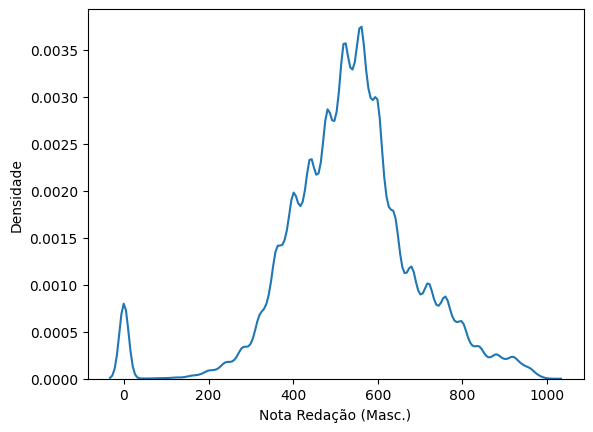

In [93]:
ax = sns.kdeplot(data= nred_h)
ax.set(xlabel='Nota Redação (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Redação (Fem.)'), Text(0, 0.5, 'Densidade')]

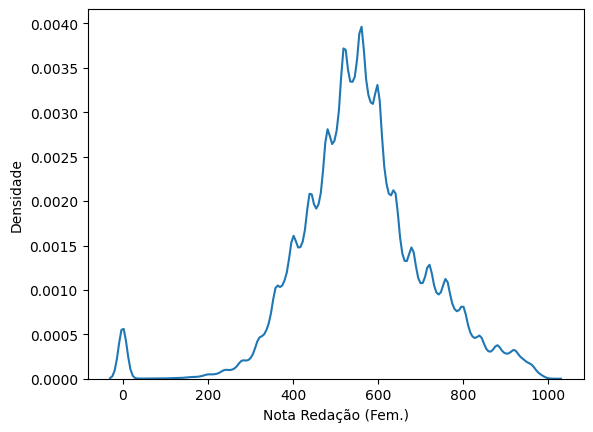

In [94]:
ax = sns.kdeplot(data= nred_m)
ax.set(xlabel='Nota Redação (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências Humanas (Masc.)'), Text(0, 0.5, 'Densidade')]

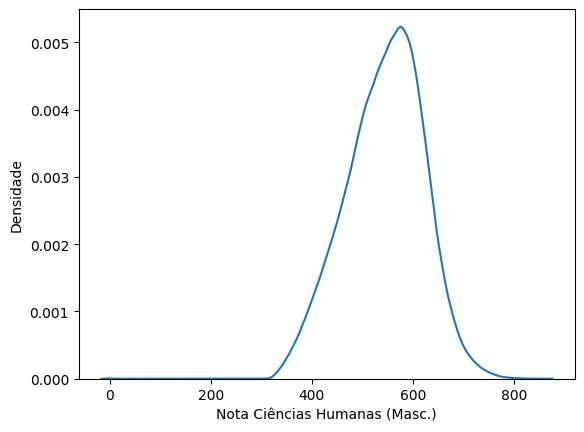

In [95]:
ax = sns.kdeplot(data= nch_h)
ax.set(xlabel='Nota Ciências Humanas (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências Humanas (Fem.)'), Text(0, 0.5, 'Densidade')]

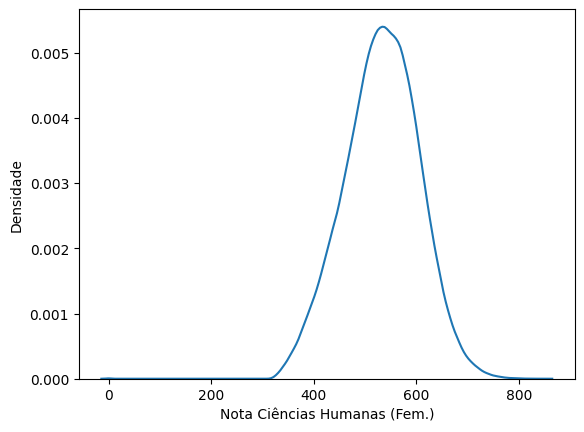

In [96]:
ax = sns.kdeplot(data= nch_m)
ax.set(xlabel='Nota Ciências Humanas (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências da Natureza (Masc.)'), Text(0, 0.5, 'Densidade')]

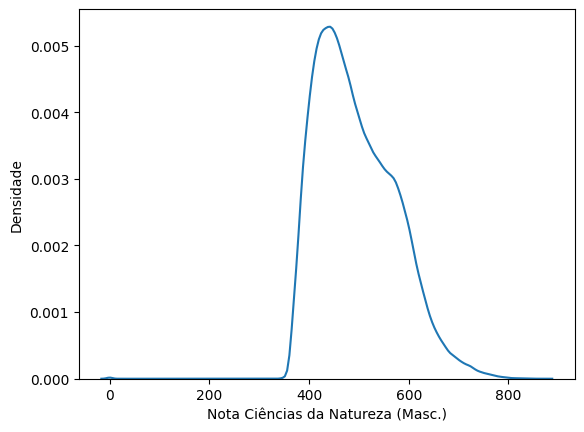

In [97]:
ax = sns.kdeplot(data= ncn_h)
ax.set(xlabel='Nota Ciências da Natureza (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências da Natureza (Fem.)'), Text(0, 0.5, 'Densidade')]

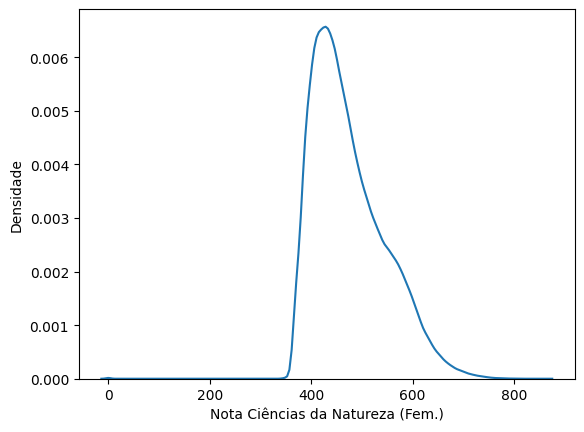

In [98]:
ax = sns.kdeplot(data= ncn_m)
ax.set(xlabel='Nota Ciências da Natureza (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Linguagens e Códigos (Masc.)'), Text(0, 0.5, 'Densidade')]

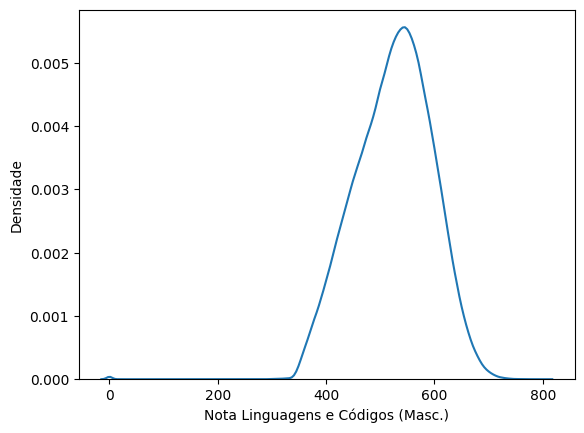

In [99]:
ax = sns.kdeplot(data= nlc_h)
ax.set(xlabel='Nota Linguagens e Códigos (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Linguagens e Códigos (Fem.)'), Text(0, 0.5, 'Densidade')]

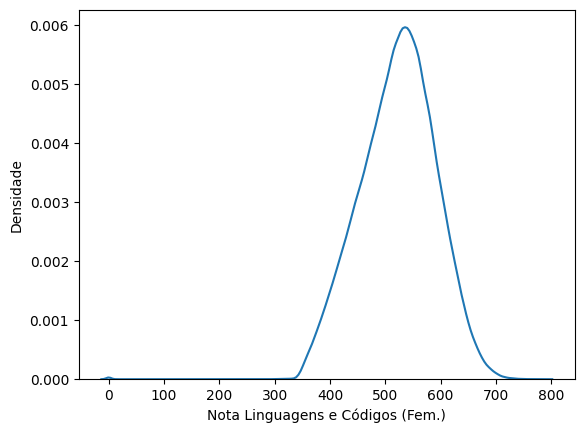

In [100]:
ax = sns.kdeplot(data= nlc_m)
ax.set(xlabel='Nota Linguagens e Códigos (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Matemática (Masc.)'), Text(0, 0.5, 'Densidade')]

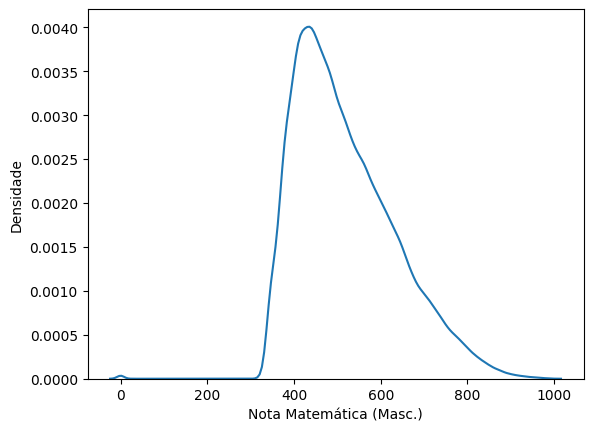

In [101]:
ax = sns.kdeplot(data= nmt_h)
ax.set(xlabel='Nota Matemática (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Matemática (Fem.)'), Text(0, 0.5, 'Densidade')]

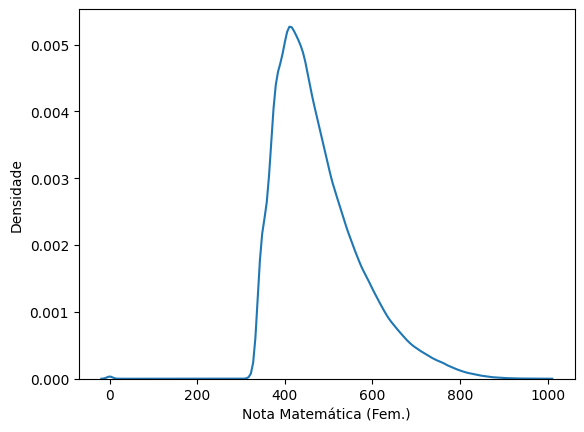

In [102]:
ax = sns.kdeplot(data= nmt_m)
ax.set(xlabel='Nota Matemática (Fem.)', ylabel='Densidade')